<a href="https://colab.research.google.com/github/MichelaPascale/AI_Python/blob/main/Notebook_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Operazioni preliminari**

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
training_data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

##**2.1. Trasformazione dati training**

In [28]:
# Cambio i valori della colonna class in 0 e 1
training_data["class"] = [1 if i == "p" else 0 for i in training_data["class"]]

# Tolgo la colonna veil-type perché ha tutti i valori uguali a p => è una colonna superflua
training_data.drop("veil-type",axis=1,inplace=True)

In [29]:
training_data

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2851,0,x,y,y,t,a,f,c,b,p,e,r,s,y,w,w,w,o,p,n,y,p
1,4918,1,x,y,n,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,n,v,u
2,5690,0,f,f,e,t,n,f,c,b,w,t,b,s,s,p,w,w,o,p,n,y,d
3,4262,1,k,y,n,f,s,f,c,n,b,t,?,k,s,w,w,w,o,e,w,v,l
4,4975,1,f,y,y,f,f,f,c,b,g,e,b,k,k,b,p,w,o,l,h,y,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,3772,1,f,f,g,f,f,f,c,b,g,e,b,k,k,b,n,w,o,l,h,v,g
5195,5191,1,k,s,e,f,y,f,c,n,b,t,?,s,s,w,p,w,o,e,w,v,p
5196,5226,0,x,s,g,f,n,f,w,b,p,t,e,f,s,w,w,w,o,e,n,a,g
5197,5390,1,f,s,e,f,f,f,c,n,b,t,?,s,s,w,p,w,o,e,w,v,d


In [30]:
#Ora modifico i valori delle features, in modo tale da avere solo numeri interi o floats e non più lettere

#Per distinguere le varie lettere all'interno di una colonna faccio in questo modo:
#- Se ho 2 valori diversi per colonna => ad uno associo 1 e all'altro 0
#- Se ho 3 valori diversi per colonna => ad uno associo 1, all'altro 0 e all'altro ancora 0.5
#- Se ho 4 valori diversi per colonna => ad uno associo 1, all'altro 0, all'altro 0.33 e all'altro ancora 0.67
# => Per calcolare questi valori uso la seguente formula matematica: 1/(len(training_data[column].unique())-1)

for column in training_data.drop(["class"], axis=1).columns:
    value = 0  #valore di base
    step = 1/(len(training_data[column].unique())-1)
    for i in training_data[column].unique():
        training_data[column] = [value if letter == i else letter for letter in training_data[column]]
        value += step

KeyboardInterrupt: ignored

In [ ]:
#Ottengo quindi un dataframe con interi e floats al posto delle lettere
training_data

##**2.2. Trasformazione dati test**

In [ ]:
# Cambio i valori della colonna class in 0 e 1
test["class"] = [1 if i == "p" else 0 for i in test["class"]]

# Tolgo la colonna veil-type perché ha tutti i valori uguali a p => è una colonna superflua
test.drop("veil-type",axis=1,inplace=True)

In [ ]:
#Ora modifico i valori delle features, in modo tale da avere solo numeri interi o floats e non più lettere

#Per distinguere le varie lettere all'interno di una colonna faccio in questo modo:
#- Se ho 2 valori diversi per colonna => ad uno associo 1 e all'altro 0
#- Se ho 3 valori diversi per colonna => ad uno associo 1, all'altro 0 e all'altro ancora 0.5
#- Se ho 4 valori diversi per colonna => ad uno associo 1, all'altro 0, all'altro 0.33 e all'altro ancora 0.67
# => Per calcolare questi valori uso la seguente formula matematica: 1/(len(test[column].unique())-1)

for column in test.drop(["class"], axis=1).columns:
    value = 0  #valore di base
    step = 1/(len(test[column].unique())-1)
    for i in test[column].unique():
        test[column] = [value if letter == i else letter for letter in test[column]]
        value += step

##**3. Lettura dei dati in training set e test set**

In [ ]:
y_train = training_data["class"].values    #prendo la colonna "class" e inserisco i valori in un array
x_train = training_data.drop(["class"], axis=1).values   # Inserisco in un array di array tutte le altre features tranne la colonna "class"

y_test = test["class"].values
x_test = test.drop(["class"], axis=1).values

##**4. Classificazione**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# creo il classificatore con K=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
print("Test set predictions:", clf.predict(x_test))

Test set predictions: [0 0 0 ... 1 0 0]


In [14]:
print("Test set accuracy: {:.2f}".format(clf.score(x_test, y_test)))

Test set accuracy: 1.00


##**5. Analisi su grafico**

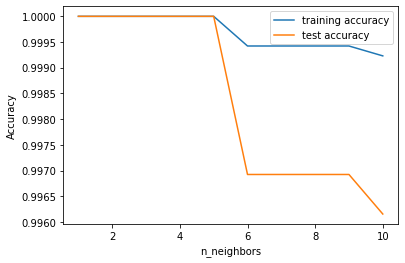

In [19]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()